In [1]:
import pandas as pd
import numpy as np
import logging
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Database loading and pre-processing

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
#Create function for checking missing values which accepts a dataframe as its parameter
def null_values_check(df): 
    #Error handling to prevent abnormal termination of operation
    try:
        #if-else statement for null value check 
        if(df.isnull().values.any() == True):
            #if there are null values present, print a column-wise summary of records with null values
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)

 this function checks if a dataset has any missing values (null values) and prints a summary of how many missing values are present in each column. If there are no missing values, it prints a message saying so. If any errors occur while checking for missing values, it logs the error to prevent the program from crashing.

In [4]:
#initialise variable with dataset name
dataset_name = ("chronic_kidney_disease.csv")

In [5]:
dataset_name = pd.read_csv("chronic_kidney_disease.csv")

In [6]:
dataset_name

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,0,0,1,1,140,...,47,6700,4.9,1,1,1,1,1,1,notckd
396,42,70,1.025,0,0,0,0,1,1,75,...,54,7800,6.2,1,1,1,1,1,1,notckd
397,12,80,1.02,0,0,0,0,1,1,100,...,49,6600,5.4,1,1,1,1,1,1,notckd
398,17,60,1.025,0,0,0,0,1,1,114,...,51,7200,5.9,1,1,1,1,1,1,notckd


In [7]:
#initialise variable with dataset name
dataset_name = ("chronic_kidney_disease.csv")

In [8]:
#error-handling to prevent abnormal termination of code
try:
    #import and load weather dataset into pandas dataframe
    chronic_kidney_disease_dataframe = pd.read_csv(dataset_name)
    
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(chronic_kidney_disease_dataframe.shape))
    print('Total number of records in dataset = ' + str(chronic_kidney_disease_dataframe.shape[0]))
    print('Total number of attributes in dataset = ' + str(chronic_kidney_disease_dataframe.shape[1]))
    print('')
    #call function created to check for null values
    null_values_check(chronic_kidney_disease_dataframe)
    #Missing value imputation
    #replace ? to nan values
    chronic_kidney_disease_dataframe = chronic_kidney_disease_dataframe.replace('?', np.nan)
    
    #set the features and the target variables
    target_class = chronic_kidney_disease_dataframe['class']
    print('\nAre there missing values in Target Class? ' + str(target_class.isna().any()))
    feature_classes = chronic_kidney_disease_dataframe.iloc[:, 0:24]
    print('\nAre there missing values in the Features? \n' + str(feature_classes.isna().any()))
    
    #KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
    knn_missing_values_imputer = KNNImputer(n_neighbors=5)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
    print('\nNow, Are there any missing values in Features? ' + str(feature_classes.isna().any()))
    
    
    #Scaling and normalization of features
    standard_feature_scaler = StandardScaler()
    feature_classes = standard_feature_scaler.fit_transform(feature_classes)
    feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    
    #Encoding target class using label encoding
    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    target_class1 = pd.DataFrame(target_class, columns=['class'])
    
    #split the dataset into training and testing data
    train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.7, test_size = 0.3)
    print('\nAfter Pre-processing:')
    print('Size of train dataset: ' + str(train_target.shape[0]))
    print('Size of test dataset: ' + str(test_target.shape[0]))
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

There is no missing values in the dataset.

Are there missing values in Target Class? False

Are there missing values in the Features? 
age       True
bp        True
sg        True
al        True
su        True
rbc      False
pc       False
pcc      False
ba       False
bgr       True
bu        True
sc        True
sod       True
pot       True
hemo      True
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool

Now, Are there any missing values in Features? age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
p

This code is attempting to import and pre-process a dataset related to chronic kidney disease. The dataset is read into a Pandas dataframe and the number of records and attributes are printed. A function is called to check for null values, and any missing values in the dataset are replaced with NaN values. The features and target variables are set, and missing values in the features are imputed using KNN imputation with 5 nearest neighbors. The features are then scaled and normalized using standard scaling. The target class is encoded using label encoding. Finally, the dataset is split into training and testing data with a 70:30 ratio.

If the specified dataset is not found, the code will raise a FileNotFoundError and log an error message.






C:\Users\vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


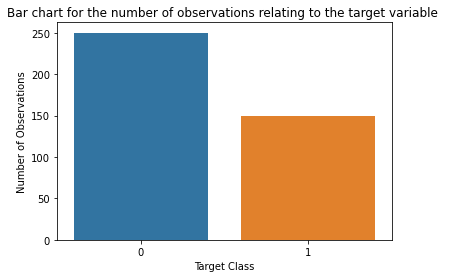

In [9]:
#Target class Visualisatiom

#graph a count plot to check the number of observations relative to the target variable
sns.countplot(pd.concat([feature_classes, target_class1], axis=1, sort=False)['class'], label = "Count")
plt.title('Bar chart for the number of observations relating to the target variable ')
plt.xlabel('Target Class')
plt.ylabel('Number of Observations')
plt.show()

 The chart displays the number of observations for a target variable, categorized by different classes.

The code first concatenates two dataframes (feature_classes and target_class1) along the columns axis using pd.concat(). Then it selects the 'class' column from the concatenated dataframe and uses it as the x-axis of the bar chart. The y-axis of the chart shows the count of observations for each class of the target variable.

The code then adds a title, x-axis label, and y-axis label to the chart using the plt.title(), plt.xlabel(), and plt.ylabel() functions, respectively. Finally, it displays the chart using plt.show().

Overall, this code creates a simple visualization that helps to understand the distribution of observations across different classes of a target variable.

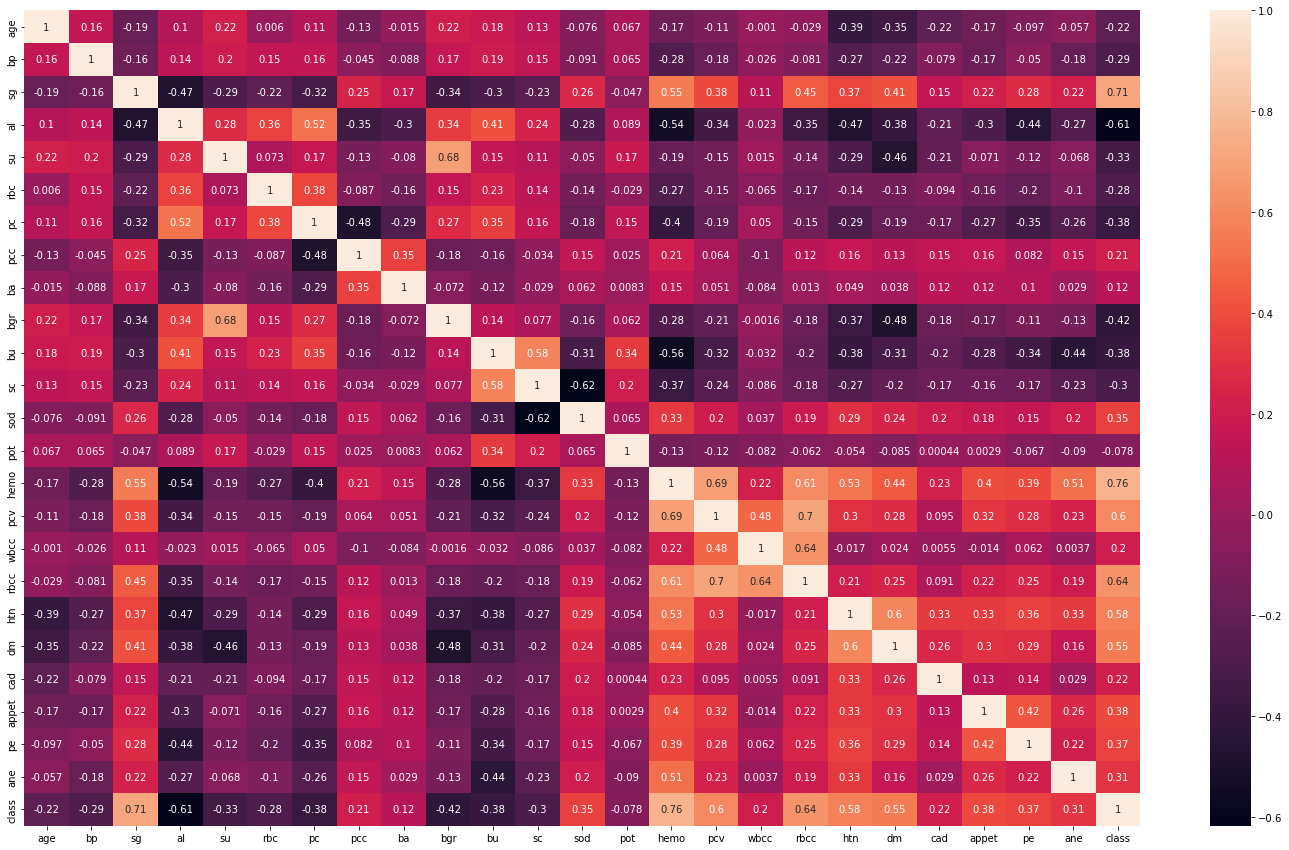



Based on the above plot, Hemoglobin (hemo) and Specific Gravity (sg) have the two highest correlation with the target variable respectively. However, no variables will be discarded for the purpose of this assessment.


In [10]:
plt.figure(figsize=(25,15)) 
sns.heatmap(pd.concat([feature_classes, target_class1], axis=1, sort=False).corr(), annot=True)
plt.show()

print('\n\nBased on the above plot, Hemoglobin (hemo) and Specific Gravity (sg) have the two highest \
correlation with the target variable respectively. However, no variables will be discarded for the \
purpose of this assessment.')

heatmap displays the correlation matrix between the features (stored in the feature_classes dataframe) and the target variable (stored in the target_class1 dataframe).

The code sets the size of the figure using plt.figure(figsize=(25,15)), and then creates the heatmap using sns.heatmap(). The correlation matrix is generated by concatenating the feature_classes and target_class1 dataframes along the columns axis using pd.concat() and then applying the corr() function to the resulting dataframe.

The annot=True argument in sns.heatmap() displays the correlation coefficient values within each cell of the heatmap.

The code then displays the heatmap using plt.show().

Finally, the code prints a message indicating that Hemoglobin (hemo) and Specific Gravity (sg) have the two highest correlation with the target variable. However, no variables will be discarded for the purpose of the assessment.

Overall, this code helps to understand the correlation between the features and the target variable in a graphical way, and also provides a simple message summarizing the findings.

In [11]:
#Support vector machine


The best parameters are:
 {'C': 1, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=1, kernel='poly', random_state=0)

Precision: 1.0
Accuracy: 0.975
Recall: 0.926829268292683
F1-score: 0.9620253164556963

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        79
           1       1.00      0.93      0.96        41

    accuracy                           0.97       120
   macro avg       0.98      0.96      0.97       120
weighted avg       0.98      0.97      0.97       120


Confusion Matrix: 
[[79  0]
 [ 3 38]]


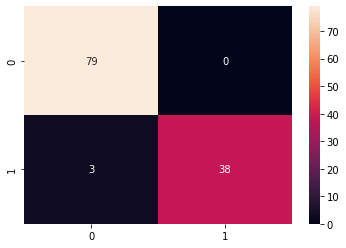

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}

#apply exhaustice gridsearch to find the optimal solution
svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

#svm predictions on test features
svm_prediction = svm_grid_search.predict(test_features)

#display SVM classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))

#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, svm_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, svm_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
plt.show()

The code imports necessary libraries such as SVM, GridSearchCV, and metrics from sklearn. It then initializes an SVM model with random state 0. It defines a grid of hyperparameters to search for the optimal combination using GridSearchCV() function. It fits the model to the training data (train_features and train_target) and searches for the optimal hyperparameters using the provided grid.

The code then prints the best parameters and the best model after grid search, and makes predictions on the test features. It calculates various performance metrics such as Precision, Accuracy, Recall, and F1-score of the SVM model using metrics functions.

The classification report is then printed, which shows various metrics such as precision, recall, f1-score, and support for each class. Finally, the confusion matrix is printed and displayed as a heatmap using the seaborn library.

Overall, this code helps to evaluate the performance of the SVM model by printing various performance metrics and visualizing the confusion matrix. It helps to identify the strengths and weaknesses of the model and understand how well it performs on the given data.

In [13]:
#K-Nearest Neighbour

The best parameters are:
 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 6, 'weights': 'uniform'}

The best model after gridsearch is:
 KNeighborsClassifier(n_jobs=1, n_neighbors=6)

Precision: 0.8863636363636364
Accuracy: 0.9416666666666667
Recall: 0.9512195121951219
F1-score: 0.9176470588235294

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        79
           1       0.89      0.95      0.92        41

    accuracy                           0.94       120
   macro avg       0.93      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120


Confusion Matrix: 
[[74  5]
 [ 2 39]]


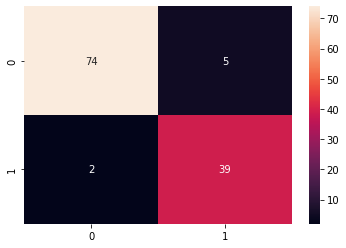

In [14]:
from sklearn.neighbors import KNeighborsClassifier

#initialise the k nearest neighbour Model
k_nearest_neighbour_model = KNeighborsClassifier()

#defining the knn parameters for grid search
knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       'weights': ['uniform', 'distance'], 
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
                       'n_jobs':[1, -1]}

#apply exhaustice gridsearch to find the optimal solution
knn_grid_search = GridSearchCV(k_nearest_neighbour_model, knn_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
knn_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(knn_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(knn_grid_search.best_estimator_))

#KNN predictions on test features
knn_prediction = knn_grid_search.predict(test_features)

#display KNN classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))

#display classification report for KNN
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, knn_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, knn_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, knn_prediction), annot = True)
plt.show()

First, the KNN model is initialized with the default hyperparameters. Then, a parameter grid is defined with a set of different hyperparameters to try for the KNN model.

Next, the GridSearchCV function is used to perform an exhaustive search over the parameter grid to find the optimal set of hyperparameters.

The best hyperparameters and the best KNN model are printed out.

The KNN model is then used to make predictions on the test dataset, and several classification metrics are calculated such as precision, recall, accuracy, and F1-score.

Finally, a classification report and a confusion matrix are printed out, followed by a heatmap visualization of the confusion matrix.

In [15]:
#Decision tree

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 4, 'splitter': 'best'}

The best model after gridsearch is:
 DecisionTreeClassifier(max_features='auto', min_samples_leaf=4, random_state=0)

Precision: 1.0
Accuracy: 0.9666666666666667
Recall: 0.9024390243902439
F1-score: 0.9487179487179488

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        79
           1       1.00      0.90      0.95        41

    accuracy                           0.97       120
   macro avg       0.98      0.95      0.96       120
weighted avg       0.97      0.97      0.97       120


Confusion Matrix: 
[[79  0]
 [ 4 37]]


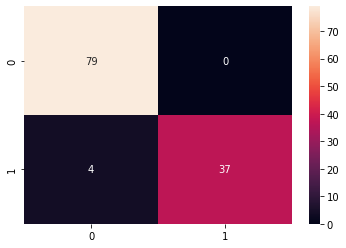

In [16]:
from sklearn.tree import DecisionTreeClassifier

#initialise the decision tree Model
decision_tree_model = DecisionTreeClassifier(random_state = 0)

#defining the decision tree parameters for grid search
dt_parameters_grid = {'criterion': ['gini', 'entropy'], 
                      'splitter': ['best', 'random'], 
                      'min_samples_leaf': [1, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
dt_grid_search = GridSearchCV(decision_tree_model, dt_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
dt_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(dt_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(dt_grid_search.best_estimator_))

#Decision Tree predictions on test features
dt_prediction = dt_grid_search.predict(test_features)

#display KNN classification Metrices for Decision Tree
print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, dt_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, dt_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, dt_prediction), annot = True)
plt.show()

This code trains a Decision Tree model using the DecisionTreeClassifier function from the sklearn.tree module. The code then performs a grid search to find the optimal hyperparameters for the Decision Tree model using GridSearchCV function from the sklearn.model_selection module. The best hyperparameters for the model are printed, and the best model is obtained using the best_estimator_ attribute of the grid search object.

The code then makes predictions on the test set using the best Decision Tree model and calculates various classification metrics such as precision, accuracy, recall, and F1-score. These metrics are displayed on the console using the metrics module from sklearn, and a classification report is also printed.

Finally, a confusion matrix is displayed using the confusion_matrix function from sklearn.metrics, and a heatmap of the confusion matrix is plotted using the heatmap function from the seaborn module. The heatmap shows the number of true positive, false positive, true negative, and false negative predictions made by the Decision Tree model.

In [17]:
#Random forest

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}

The best model after gridsearch is:
 RandomForestClassifier(n_estimators=30, random_state=0)

Precision: 0.9743589743589743
Accuracy: 0.9666666666666667
Recall: 0.926829268292683
F1-score: 0.9500000000000001

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        79
           1       0.97      0.93      0.95        41

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120


Confusion Matrix: 
[[78  1]
 [ 3 38]]


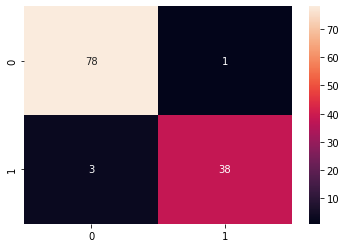

In [18]:
from sklearn.ensemble import RandomForestClassifier

#initialise the random forest Model
random_forest_model = RandomForestClassifier(random_state = 0)

#defining the random forest parameters for grid search
rf_parameters_grid = {'n_estimators': [10, 30, 40, 50, 60, 70, 80, 90, 100], 
                      'criterion': ['gini', 'entropy'],
                      'min_samples_split': [1.0, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
rf_grid_search = GridSearchCV(random_forest_model, rf_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
rf_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(rf_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(rf_grid_search.best_estimator_))

#Random Forest predictions on test features
rf_prediction = rf_grid_search.predict(test_features)

#display KNN classification Metrices for Decision Tree
print('\nPrecision: ' + str(metrics.precision_score(test_target, rf_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, rf_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, rf_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, rf_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, rf_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, rf_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, rf_prediction), annot = True)
plt.show()

This code trains a Random Forest Classifier model using the scikit-learn library. It first initializes a RandomForestClassifier model with default hyperparameters, and then defines a grid of hyperparameters to search over using GridSearchCV. GridSearchCV exhaustively searches over the parameter grid to find the best set of hyperparameters that result in the highest accuracy score.

After fitting the data to the grid, the code prints out the best parameters and best estimator (model) obtained from GridSearchCV. It then uses the best estimator to make predictions on the test set, calculates and displays classification metrics such as precision, accuracy, recall, and F1-score, classification report, and confusion matrix. Finally, it plots the confusion matrix using seaborn.